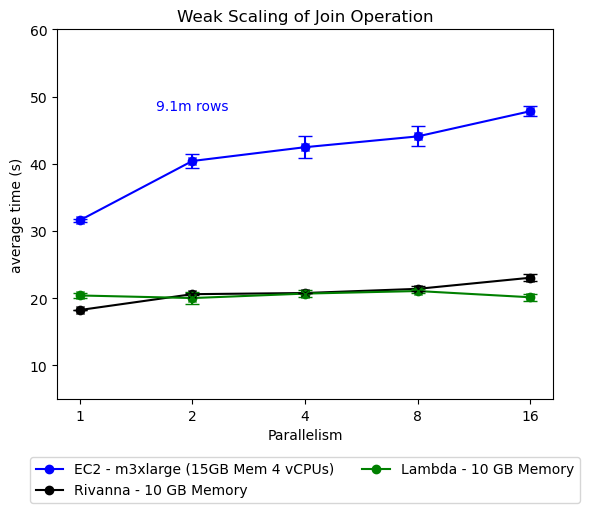

In [17]:
import matplotlib.pyplot as plt

# Given data
world_size = ['1', '2', '4', '8', '16']
m3xlarge = [31.57827055, 40.42526209, 42.48108244, 44.08796617, 47.843523]
#fargate_16_28 = [33.68915534, 43.69193071, 41.93854758, 47.86141147, 47.81775132]
rivanna_10GB = [18.24416029, 20.60858124, 20.78106607, 21.40211465, 23.05694579]
lambda_10GB = [20.4175576, 20.03076804, 20.69381972, 21.07601555, 20.14870176]


m3xlarge_err = [0.2038667311, 1.094349857, 1.676429148, 1.502445908, 0.7847227455]
#fargate_16_28_err = [ 0.06717432151, 0.1975157265, 1.030607572, 0.6329357667, 1.287566371]
rivanna_10GB_err = [0.04521065741, 0.123516355, 0.04790843696, 0.3732098776, 0.5051334901]
lambda_10GB_err = [0.3223338864, 0.8356659236, 0.5303307103, 0.259753258, 0.5288880707 ]


# Create a line chart
plt.plot(world_size, m3xlarge, marker='o', color='b', label='EC2 - m3xlarge (15GB Mem 4 vCPUs)')
#plt.plot(world_size, fargate_16_28, marker='o', color='r', label='Fargate - 16 CPU/28 GB Memory')
plt.plot(world_size, rivanna_10GB, marker='o', color='black', label='Rivanna - 10 GB Memory')
plt.plot(world_size, lambda_10GB, marker='o', color='g', label='Lambda - 10 GB Memory')

plt.errorbar(world_size, m3xlarge, yerr=m3xlarge_err, fmt='x', color='b', ecolor='b', capsize=5)
#plt.errorbar(world_size, fargate_16_28, yerr=fargate_16_28_err, fmt='x', color='r', ecolor='r', capsize=5)
plt.errorbar(world_size, rivanna_10GB, yerr=rivanna_10GB_err, fmt='x', color='black', ecolor='black', capsize=5)
plt.errorbar(world_size, lambda_10GB, yerr=lambda_10GB_err, fmt='x', color='g', ecolor='g', capsize=5)

custom_text = "9.1m rows"
plt.text(1, 48, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(5, 60)

plt.xticks(world_size)

# Add labels and title
plt.xlabel('Parallelism')
plt.ylabel('average time (s)')
plt.title('Weak Scaling of Join Operation')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 

plt.savefig('join-w-scaling.svg', format='svg')

# Display the chart
plt.show()

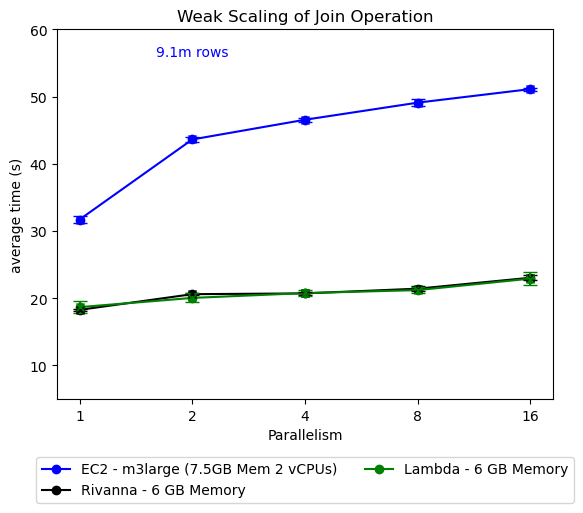

In [18]:
import matplotlib.pyplot as plt

# Given data
world_size = ['1', '2', '4', '8', '16']
m3large = [31.71825963, 43.63236368, 46.56648615, 49.11144567, 51.12758547]
#fargate_4_26 = [33.68915534, 43.69193071, 41.93854758, 47.86141147, 47.81775132]
rivanna_6GB = [18.2778548, 20.607876, 20.72528571, 21.42728365, 23.0560276]
lambda_6GB = [18.67931765, 20.05292544, 20.77114639, 21.21451118, 22.92575049]


m3large_err = [0.4891137684, 0.437216625, 0.3161470289, 0.5698057132, 0.2221095351]
#fargate_16_28_err = [ 0.06717432151, 0.1975157265, 1.030607572, 0.6329357667, 1.287566371]
rivanna_6GB_err = [0.1082922049, 0.1178178359, 0.2236477965, 0.3307268371, 0.3448240028]
lambda_6GB_err = [0.9371924984, 0.6816772169, 0.488337019, 0.429582007, 0.9709855563]


# Create a line chart
plt.plot(world_size, m3large, marker='o', color='b', label='EC2 - m3large (7.5GB Mem 2 vCPUs)')
#plt.plot(world_size, fargate_16_28, marker='o', color='r', label='Fargate - 4 CPU/26 GB Memory')
plt.plot(world_size, rivanna_6GB, marker='o', color='black', label='Rivanna - 6 GB Memory')
plt.plot(world_size, lambda_6GB, marker='o', color='g', label='Lambda - 6 GB Memory')


plt.errorbar(world_size, m3large, yerr=m3large_err, fmt='x', color='b', ecolor='b', capsize=5)
#plt.errorbar(world_size, fargate_16_28, yerr=fargate_16_28_err, fmt='x', color='r', ecolor='r', capsize=5)
plt.errorbar(world_size, rivanna_6GB, yerr=rivanna_6GB_err, fmt='x', color='black', ecolor='black', capsize=5)
plt.errorbar(world_size, lambda_6GB, yerr=lambda_6GB_err, fmt='x', color='g', ecolor='g', capsize=5)

custom_text = "9.1m rows"
plt.text(1, 56, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(5, 60)

plt.xticks(world_size)

# Add labels and title
plt.xlabel('Parallelism')
plt.ylabel('average time (s)')
plt.title('Weak Scaling of Join Operation')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 

plt.savefig('join-w-scaling.svg', format='svg')

# Display the chart
plt.show()

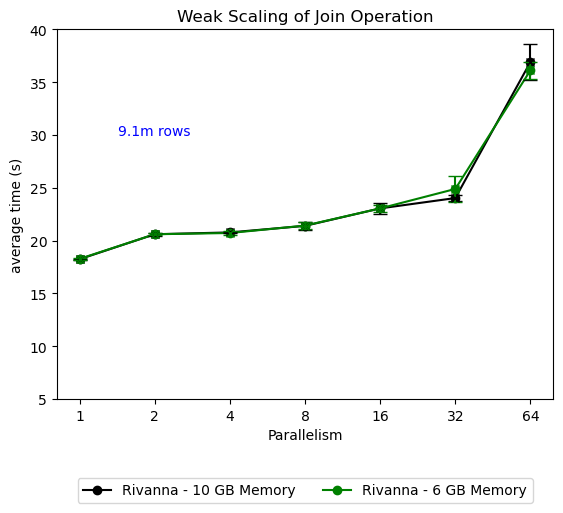

In [16]:
import matplotlib.pyplot as plt

# Given data
world_size = ['1', '2', '4', '8', '16', '32', '64']

#fargate_16_28 = [33.68915534, 43.69193071, 41.93854758, 47.86141147, 47.81775132]
rivanna_10GB = [18.24416029, 20.60858124, 20.78106607, 21.40211465, 23.05694579, 24.03629866, 36.92537579]
rivanna_6GB = [18.2778548, 20.607876, 20.72528571, 21.42728365, 23.0560276, 24.897775, 36.14100222]



#fargate_16_28_err = [ 0.06717432151, 0.1975157265, 1.030607572, 0.6329357667, 1.287566371]
rivanna_10GB_err = [0.04521065741, 0.123516355, 0.04790843696, 0.3732098776, 0.5051334901, 0.2561240218, 1.70350942]
rivanna_6GB_err = [0.1082922049, 0.1178178359, 0.2236477965, 0.3307268371, 0.3448240028, 1.267297664, 0.7986780213]


# Create a line chart


plt.plot(world_size, rivanna_10GB, marker='o', color='black', label='Rivanna - 10 GB Memory')
plt.plot(world_size, rivanna_6GB, marker='o', color='g', label='Rivanna - 6 GB Memory')


plt.errorbar(world_size, rivanna_10GB, yerr=rivanna_10GB_err, fmt='x', color='black', ecolor='black', capsize=5)
plt.errorbar(world_size, rivanna_6GB, yerr=rivanna_6GB_err, fmt='x', color='g', ecolor='g', capsize=5)

custom_text = "9.1m rows"
plt.text(1, 30, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(5, 40)

plt.xticks(world_size)

# Add labels and title
plt.xlabel('Parallelism')
plt.ylabel('average time (s)')
plt.title('Weak Scaling of Join Operation')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 

plt.savefig('join-w-scaling.svg', format='svg')

# Display the chart
plt.show()

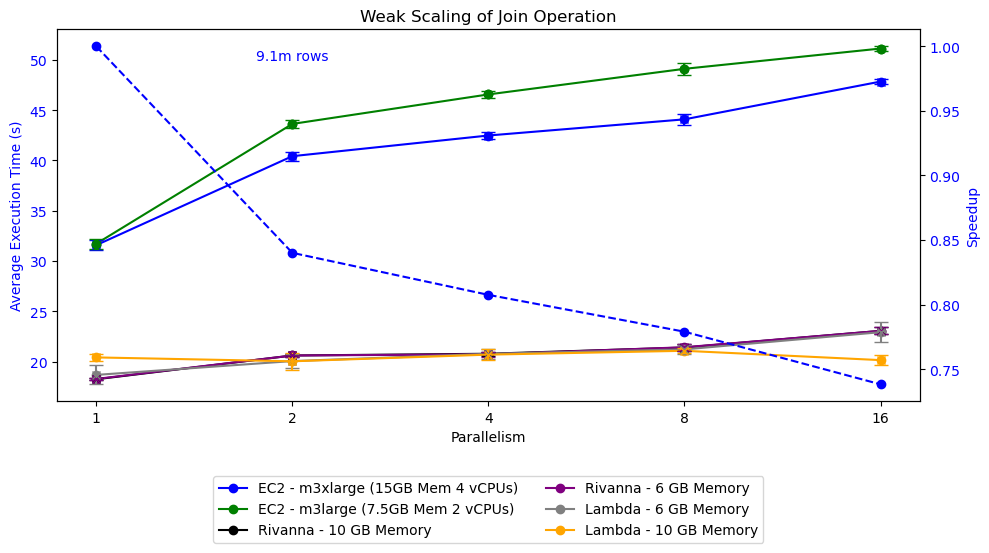

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
world_size = ['1', '2', '4', '8', '16']
m3xlarge = [31.57827055, 40.42526209, 42.48108244, 44.08796617, 47.843523]
#fargate_16_28 = [33.68915534, 43.69193071, 41.93854758, 47.86141147, 47.81775132]
rivanna_10GB = [18.24416029, 20.60858124, 20.78106607, 21.40211465, 23.05694579]
m3large = [31.71825963, 43.63236368, 46.56648615, 49.11144567, 51.12758547]
#fargate_4_26 = [33.68915534, 43.69193071, 41.93854758, 47.86141147, 47.81775132]
rivanna_6GB = [18.2778548, 20.607876, 20.72528571, 21.42728365, 23.0560276]
lambda_10GB = [20.4175576, 20.03076804, 20.69381972, 21.07601555, 20.14870176]
lambda_6GB = [18.67931765, 20.05292544, 20.77114639, 21.21451118, 22.92575049]

m3xlarge_err = [0.4891137684, 0.437216625, 0.3161470289, 0.5698057132, 0.2221095351]
#fargate_16_28_err = [ 0.06717432151, 0.1975157265, 1.030607572, 0.6329357667, 1.287566371]
rivanna_10GB_err = [0.1082922049, 0.1178178359, 0.2236477965, 0.3307268371, 0.3448240028]
m3large_err = [0.4891137684, 0.437216625, 0.3161470289, 0.5698057132, 0.2221095351]
#fargate_4_26_err = [ 0.06717432151, 0.1975157265, 1.030607572, 0.6329357667, 1.287566371]
rivanna_6GB_err = [0.1082922049, 0.1178178359, 0.2236477965, 0.3307268371, 0.3448240028]
lambda_6GB_err = [0.9371924984, 0.6816772169, 0.488337019, 0.429582007, 0.9709855563]
lambda_10GB_err = [0.3223338864, 0.8356659236, 0.5303307103, 0.259753258, 0.5288880707 ]

# Combine all datasets into a single array for averaging
datasets = np.array([
    m3xlarge,   # Dataset 1
    #fargate_16_28,   # Dataset 2
    rivanna_10GB,   # Dataset 3
    m3large,   # Dataset 4
    #fargate_4_26,   # Dataset 5
    rivanna_6GB,     # Dataset 6
    lambda_10GB,
    lambda_6GB
])

# Calculate the average execution time for each number of nodes
avg_execution_time = np.mean(datasets, axis=0)

# Calculate speedup (S_p = T_1 / T_p)
speedup = avg_execution_time[0] / avg_execution_time  # Baseline is avg_execution_time[0]
speedup[0] = 1  # Speedup for a single node is always 1



# Create the main plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot execution times
ax1.plot(world_size, m3xlarge, marker='o', color='b', label='EC2 - m3xlarge (15GB Mem 4 vCPUs)')
ax1.plot(world_size, m3large, marker='o', color='g', label='EC2 - m3large (7.5GB Mem 2 vCPUs)')
#ax1.plot(world_size, fargate_4_26, marker='o', color='r', label='Fargate - 4 CPU/26 GB Memory')
#ax1.plot(world_size, fargate_16_28, marker='o', color='orange', label='Fargate - 16 CPU/28 GB Memory')
ax1.plot(world_size, rivanna_10GB, marker='o', color='black', label='Rivanna - 10 GB Memory')
ax1.plot(world_size, rivanna_6GB, marker='o', color='purple', label='Rivanna - 6 GB Memory')
ax1.plot(world_size, lambda_6GB, marker='o', color='grey', label='Lambda - 6 GB Memory')
ax1.plot(world_size, lambda_10GB, marker='o', color='orange', label='Lambda - 10 GB Memory')

# Add error bars
ax1.errorbar(world_size, m3xlarge, yerr=m3xlarge_err, fmt='x', color='b', ecolor='b', capsize=5)
ax1.errorbar(world_size, m3large, yerr=m3large_err, fmt='o', color='g', ecolor='g', capsize=5)
#ax1.errorbar(world_size, fargate_4_26, yerr=fargate_4_26_err, fmt='x', color='r', ecolor='r', capsize=5)
#ax1.errorbar(world_size, fargate_16_28, yerr=fargate_16_28_err, fmt='x', color='orange', ecolor='orange', capsize=5)
ax1.errorbar(world_size, rivanna_10GB, yerr=rivanna_10GB_err, fmt='x', color='black', ecolor='black', capsize=5)
ax1.errorbar(world_size, rivanna_6GB, yerr=rivanna_6GB_err, fmt='x', color='purple', ecolor='purple', capsize=5)
ax1.errorbar(world_size, lambda_6GB, yerr=lambda_6GB_err, fmt='x', color='grey', ecolor='grey', capsize=5)
ax1.errorbar(world_size, lambda_10GB, yerr=lambda_10GB_err, fmt='x', color='orange', ecolor='orange', capsize=5)


# Customize primary y-axis
ax1.set_xlabel('Parallelism')
ax1.set_ylabel('Average Execution Time (s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Weak Scaling of Join Operation')

# Add a second y-axis for speedup
ax2 = ax1.twinx()
ax2.plot(world_size, speedup, 'o--', color='blue', label='Speedup (Avg)')
ax2.set_ylabel('Speedup', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


custom_text = "9.1m rows"
ax1.text(1, 50, custom_text, fontsize=10, color='blue', ha='center')

# Add legends
ax1.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2) 
#ax1.legend(loc="upper left")
#ax2.legend(loc="upper right")

# Adjust layout and save
plt.tight_layout()
plt.savefig('join-s-scaling-speedup.svg', format='svg')
plt.show()

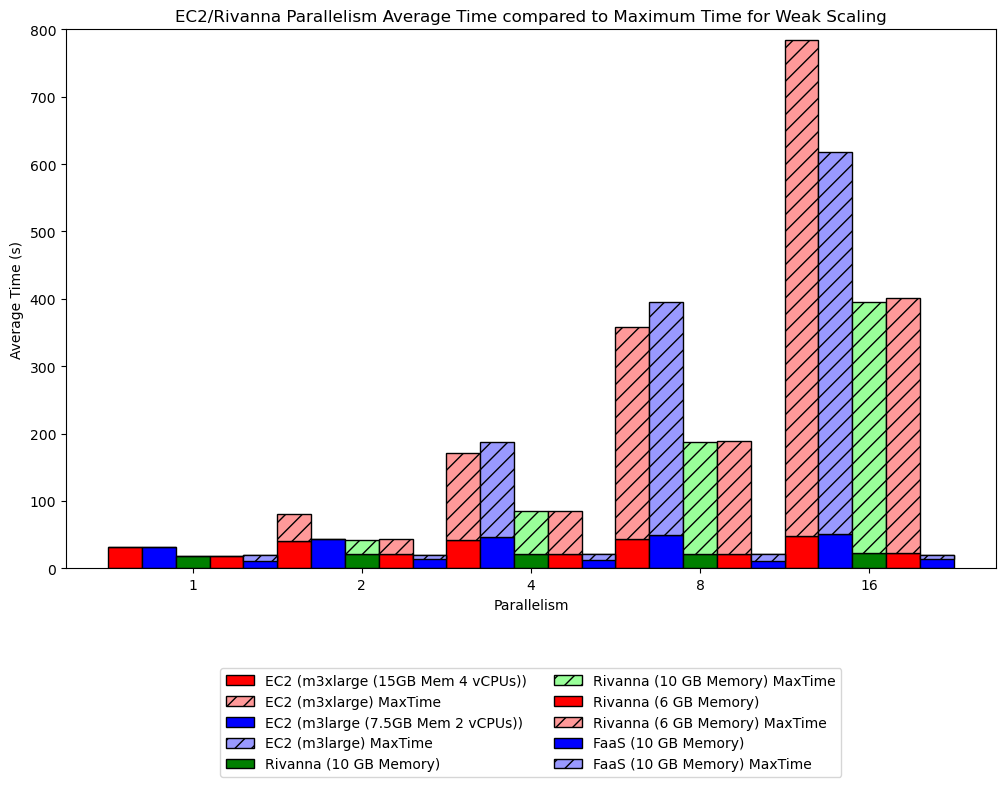

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
world_size = ['1', '2', '4', '8', '16']
m3xlarge = [31.57827055, 40.42526209, 42.48108244, 44.08796617, 47.843523]
rivanna_10GB = [18.24416029, 20.60858124, 20.78106607, 21.40211465, 23.05694579]
m3large = [31.71825963, 43.63236368, 46.56648615, 49.11144567, 51.12758547]
rivanna_6GB = [18.2778548, 20.607876, 20.72528571, 21.42728365, 23.0560276]
lambda_10GB = [20.4175576, 20.03076804, 20.69381972, 21.07601555, 20.14870176]
lambda_6GB = [18.67931765, 20.05292544, 20.77114639, 21.21451118, 22.92575049]

# Max times
m3xlarge_maxtime = [31.76309943, 81.20064813, 171.8731022, 358.3511644, 784.544154]
m3large_maxtime = [32.02841443, 43.82524204, 187.6989848, 395.7447579, 618.4843755]
rivanna_10_maxtime = [18.44550091, 41.72224802, 85.1699512, 187.0062265, 394.799438]
rivanna_6_maxtime = [18.34442371, 43.82524204, 84.57718474, 188.3389728, 401.7538987]
lambda_6GB_err = [0.9371924984, 0.6816772169, 0.488337019, 0.429582007, 0.9709855563]
lambda_10GB_err = [0.3223338864, 0.8356659236, 0.5303307103, 0.259753258, 0.5288880707 ]

# Set width of bar
barWidth = 0.2

br1 = np.arange(len(world_size))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

fig, ax = plt.subplots(figsize=(12, 7))

# Create custom colors
base_colors = ['red', 'blue', 'green']
max_colors = ['#FF9999', '#9999FF', '#99FF99']  # Lighter shades of red, blue, green

# Create the bars
plt.bar(br1, m3xlarge, width=barWidth, color=base_colors[0], edgecolor='black', label='EC2 (m3xlarge (15GB Mem 4 vCPUs))')
plt.bar(br1, np.subtract(m3xlarge_maxtime, m3xlarge), width=barWidth, bottom=m3xlarge,
        color=max_colors[0], edgecolor='black', hatch='//', label='EC2 (m3xlarge) MaxTime')

plt.bar(br2, m3large, width=barWidth, color=base_colors[1], edgecolor='black', label='EC2 (m3large (7.5GB Mem 2 vCPUs))')
plt.bar(br2, np.subtract(m3large_maxtime, m3large), width=barWidth, bottom=m3large,
        color=max_colors[1], edgecolor='black', hatch='//', label='EC2 (m3large) MaxTime')

plt.bar(br3, rivanna_10GB, width=barWidth, color=base_colors[2], edgecolor='black', label='Rivanna (10 GB Memory)')
plt.bar(br3, np.subtract(rivanna_10_maxtime, rivanna_10GB), width=barWidth, bottom=rivanna_10GB,
        color=max_colors[2], edgecolor='black', hatch='//', label='Rivanna (10 GB Memory) MaxTime')

plt.bar(br4, rivanna_6GB, width=barWidth, color=base_colors[0], edgecolor='black', label='Rivanna (6 GB Memory)')
plt.bar(br4, np.subtract(rivanna_6_maxtime, rivanna_6GB), width=barWidth, bottom=rivanna_6GB,
        color=max_colors[0], edgecolor='black', hatch='//', label='Rivanna (6 GB Memory) MaxTime')

plt.bar(br5, lambda_10GB, width=barWidth, color=base_colors[1], edgecolor='black', label='FaaS (10 GB Memory)')
plt.bar(br5, np.subtract(lambda_10_maxtime, lambda_10GB), width=barWidth, bottom=lambda_10GB,
        color=max_colors[1], edgecolor='black', hatch='//', label='FaaS (10 GB Memory) MaxTime')

# Customize the chart
plt.ylim(0, 800)
plt.xticks([r + 2*barWidth for r in range(len(world_size))], world_size)

# Add labels and title
plt.xlabel('Parallelism')
plt.ylabel('Average Time (s)')
plt.title('EC2/Rivanna Parallelism Average Time compared to Maximum Time for Weak Scaling')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2) 

# Display the chart
plt.show()


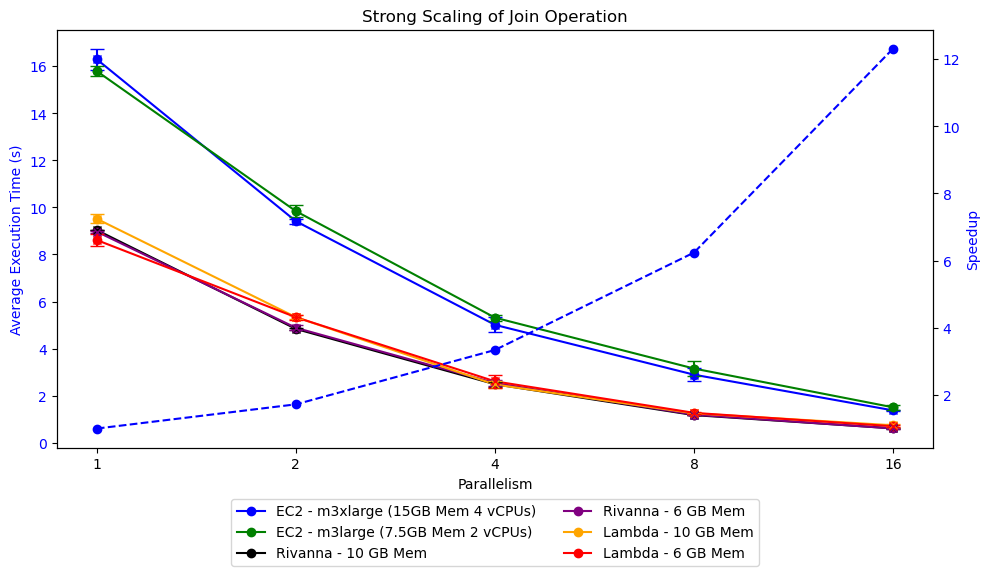

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
m3xlarge = [16.28875554, 9.410466671, 5.008414954, 2.89139092, 1.374333758]
m3large = [15.78684437, 9.837915748, 5.314118594, 3.152216733, 1.5044435 ]
rivanna_10GB = [9.033496261, 4.835889399, 2.485956118, 1.17392955, 0.6112828404]
rivanna_6GB = [8.966786265, 4.883185923, 2.53647846, 1.193392381, 0.6066191979]
lambda_10GB = [9.513354778, 5.335469663, 2.475117937, 1.249511041, 0.7414773665 ]
lambda_6GB = [8.610333025, 5.331662387, 2.60870406, 1.269696467, 0.7010446712 ]

m3xlarge_err = [0.4599095235, 0.1164773209, 0.3224509436, 0.2719943569, 0.01319974511]
rivanna_10GB_err = [0.01119918326, 0.0563410027, 0.09907851901, 0.003486893964, 0.007529179935]
m3large_err = [0.2241754298, 0.2538402622, 0.1270872455, 0.3304195746, 0.1094642427]
rivanna_6GB_err = [0.04204748119, 0.108914922, 0.1267724711, 0.001793096262, 0.001604104395]
lambda_10GB_err = [0.185130618, 0.0982287878, 0.136204437, 0.02171586327, 0.06490249175 ]
lambda_6GB_err = [0.2588720716, 0.1004838776, 0.2687386219, 0.0502177742, 0.04703823834]

# Combine all datasets into a single array for averaging
datasets = np.array([
    m3xlarge,
    #fargate_16_28,
    rivanna_10GB,
    m3large,
    rivanna_6GB,
    lambda_10GB,
    lambda_6GB
])

# Calculate the average execution time for each number of nodes
avg_execution_time = np.mean(datasets, axis=0)

# Calculate speedup (S_p = T_1 / T_p)
speedup = avg_execution_time[0] / avg_execution_time  # Baseline is avg_execution_time[0]
speedup[0] = 1  # Speedup for a single node is always 1



# Create the main plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot execution times
ax1.plot(world_size, m3xlarge, marker='o', color='b', label='EC2 - m3xlarge (15GB Mem 4 vCPUs)')
ax1.plot(world_size, m3large, marker='o', color='g', label='EC2 - m3large (7.5GB Mem 2 vCPUs)')
#ax1.plot(world_size, fargate_4_26, marker='o', color='r', label='Fargate - 4 CPU/26 GB Memory')
#ax1.plot(world_size, fargate_16_28, marker='o', color='orange', label='Fargate - 16 CPU/28 GB Memory')
ax1.plot(world_size, rivanna_10GB, marker='o', color='black', label='Rivanna - 10 GB Mem')
ax1.plot(world_size, rivanna_6GB, marker='o', color='purple', label='Rivanna - 6 GB Mem')
ax1.plot(world_size, lambda_10GB, marker='o', color='orange', label='Lambda - 10 GB Mem')
ax1.plot(world_size, lambda_6GB, marker='o', color='red', label='Lambda - 6 GB Mem')


# Add error bars
ax1.errorbar(world_size, m3xlarge, yerr=m3xlarge_err, fmt='x', color='b', ecolor='b', capsize=5)
ax1.errorbar(world_size, m3large, yerr=m3large_err, fmt='o', color='g', ecolor='g', capsize=5)
#ax1.errorbar(world_size, fargate_4_26, yerr=fargate_4_26_err, fmt='x', color='r', ecolor='r', capsize=5)
#ax1.errorbar(world_size, fargate_16_28, yerr=fargate_16_28_err, fmt='x', color='orange', ecolor='orange', capsize=5)
ax1.errorbar(world_size, rivanna_10GB, yerr=rivanna_10GB_err, fmt='x', color='black', ecolor='black', capsize=5)
ax1.errorbar(world_size, rivanna_6GB, yerr=rivanna_6GB_err, fmt='x', color='purple', ecolor='purple', capsize=5)
ax1.errorbar(world_size, lambda_10GB, yerr=lambda_10GB_err, fmt='x', color='orange', ecolor='orange', capsize=5)
ax1.errorbar(world_size, lambda_6GB, yerr=lambda_6GB_err, fmt='x', color='red', ecolor='red', capsize=5)

# Customize primary y-axis
ax1.set_xlabel('Parallelism')
ax1.set_ylabel('Average Execution Time (s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Strong Scaling of Join Operation')

# Add a second y-axis for speedup
ax2 = ax1.twinx()
ax2.plot(world_size, speedup, 'o--', color='blue', label='Speedup (Avg)')
ax2.set_ylabel('Speedup', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends
ax1.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 
#ax1.legend(loc="upper left")
#ax2.legend(loc="upper right")

# Adjust layout and save
plt.tight_layout()
plt.savefig('join-s-scaling-speedup.svg', format='svg')
plt.show()

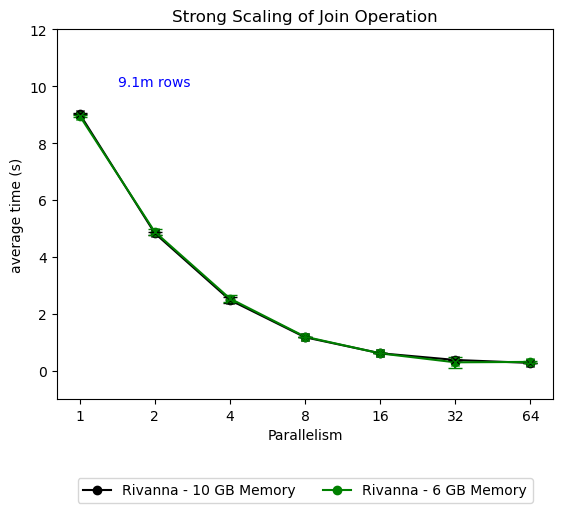

In [14]:
import matplotlib.pyplot as plt

# Given data
world_size = ['1', '2', '4', '8', '16', '32', '64']

#fargate_16_28 = [33.68915534, 43.69193071, 41.93854758, 47.86141147, 47.81775132]
rivanna_10GB = [9.033496261, 4.835889399, 2.485956118, 1.17392955, 0.6112828404, 0.3753986321, 0.2710187193]
rivanna_6GB = [8.966786265, 4.883185923, 2.53647846, 1.193392381, 0.6066191979, 0.2925303898, 0.3072750513]



#fargate_16_28_err = [ 0.06717432151, 0.1975157265, 1.030607572, 0.6329357667, 1.287566371]
rivanna_10GB_err = [0.01119918326, 0.0563410027, 0.09907851901, 0.003486893964, 0.007529179935, 0.0007876140521, 0.014474426]
rivanna_6GB_err = [0.04204748119, 0.108914922, 0.1267724711, 0.001793096262, 0.001604104395, 0.1942700632, 0.0270945999]


# Create a line chart


plt.plot(world_size, rivanna_10GB, marker='o', color='black', label='Rivanna - 10 GB Memory')
plt.plot(world_size, rivanna_6GB, marker='o', color='g', label='Rivanna - 6 GB Memory')


plt.errorbar(world_size, rivanna_10GB, yerr=rivanna_10GB_err, fmt='x', color='black', ecolor='black', capsize=5)
plt.errorbar(world_size, rivanna_6GB, yerr=rivanna_6GB_err, fmt='x', color='g', ecolor='g', capsize=5)

custom_text = "9.1m rows"
plt.text(1, 10, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(-1, 12)

plt.xticks(world_size)

# Add labels and title
plt.xlabel('Parallelism')
plt.ylabel('average time (s)')
plt.title('Strong Scaling of Join Operation')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 

plt.savefig('join-w-scaling.svg', format='svg')

# Display the chart
plt.show()

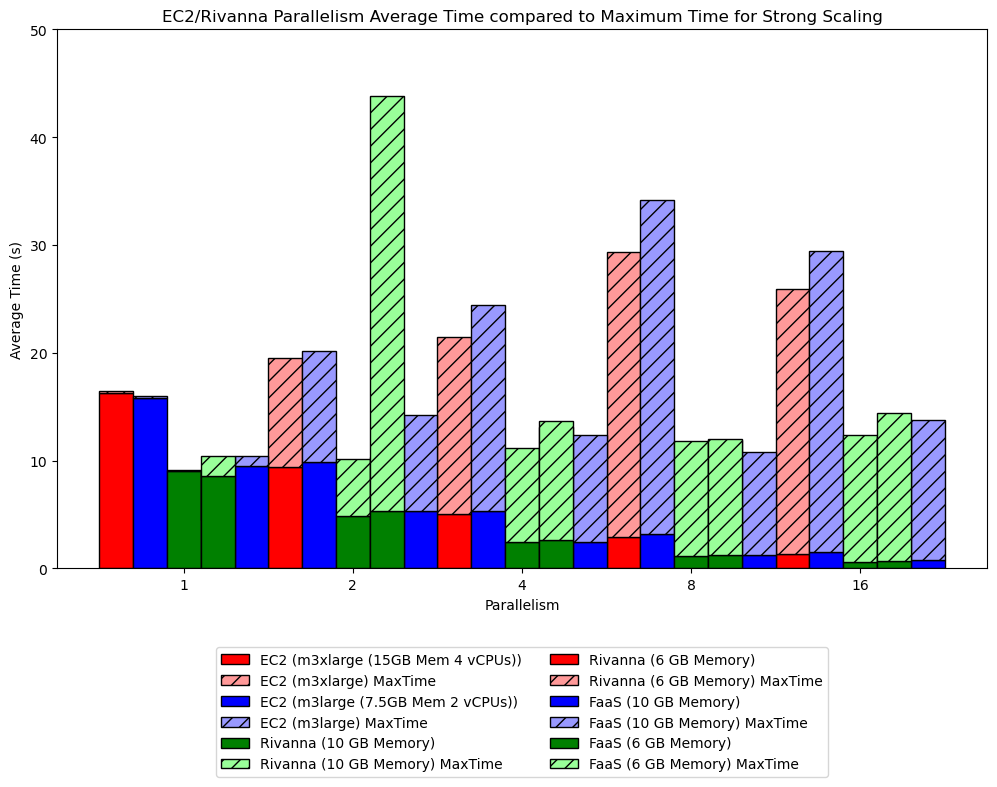

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
world_size = ['1', '2', '4', '8', '16']
m3xlarge = [16.28875554, 9.410466671, 5.008414954, 2.89139092, 1.374333758]
m3large = [15.78684437, 9.837915748, 5.314118594, 3.152216733, 1.5044435 ]
rivanna_10GB = [9.033496261, 4.835889399, 2.485956118, 1.17392955, 0.6112828404]
rivanna_6GB = [8.966786265, 4.883185923, 2.53647846, 1.193392381, 0.6066191979]
lambda_10GB = [9.513354778, 5.335469663, 2.475117937, 1.249511041, 0.7414773665 ]
lambda_6GB = [8.610333025, 5.331662387, 2.60870406, 1.269696467, 0.7010446712 ]

# Max times
ec2_m3xlarge_maxtime = [16.42245144, 19.50203061, 21.48856145, 29.35029984, 25.92182577]
ec2_m3large_maxtime = [15.97643435, 20.16908944, 24.46046752, 34.14724278, 29.43531328]
rivanna_10_maxtime = [9.095165491, 10.16544342, 11.13783789, 11.82813108, 12.39383399]
rivanna_6_maxtime = [4.507326188, 10.3137908, 13.07380444, 11.87995195, 12.21407473]
lambda_10_maxtime = [10.38668597, 14.25718212, 12.32892323, 10.7510832, 13.74502975]
lambda_6_maxtime = [10.45681238, 43.82524204, 13.62803018, 11.96957582, 14.37647688]

# Set width of bar
barWidth = 0.2

br1 = np.arange(len(world_size))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

fig, ax = plt.subplots(figsize=(12, 7))

# Custom colors
base_colors = ['red', 'blue', 'green']
max_colors = ['#FF9999', '#9999FF', '#99FF99']  # Lighter shades of red, blue, green

# Plot bars
plt.bar(br1, m3xlarge, width=barWidth, color=base_colors[0], edgecolor='black', label='EC2 (m3xlarge (15GB Mem 4 vCPUs))')
plt.bar(br1, np.subtract(ec2_m3xlarge_maxtime, m3xlarge), width=barWidth, bottom=m3xlarge,
        color=max_colors[0], edgecolor='black', hatch='//', label='EC2 (m3xlarge) MaxTime')

plt.bar(br2, m3large, width=barWidth, color=base_colors[1], edgecolor='black', label='EC2 (m3large (7.5GB Mem 2 vCPUs))')
plt.bar(br2, np.subtract(ec2_m3large_maxtime, m3large), width=barWidth, bottom=m3large,
        color=max_colors[1], edgecolor='black', hatch='//', label='EC2 (m3large) MaxTime')

plt.bar(br3, rivanna_10GB, width=barWidth, color=base_colors[2], edgecolor='black', label='Rivanna (10 GB Memory)')
plt.bar(br3, np.subtract(rivanna_10_maxtime, rivanna_10GB), width=barWidth, bottom=rivanna_10GB,
        color=max_colors[2], edgecolor='black', hatch='//', label='Rivanna (10 GB Memory) MaxTime')

plt.bar(br4, rivanna_6GB, width=barWidth, color=base_colors[0], edgecolor='black', label='Rivanna (6 GB Memory)')
plt.bar(br4, np.subtract(rivanna_6_maxtime, rivanna_6GB), width=barWidth, bottom=rivanna_6GB,
        color=max_colors[0], edgecolor='black', hatch='//', label='Rivanna (6 GB Memory) MaxTime')

plt.bar(br5, lambda_10GB, width=barWidth, color=base_colors[1], edgecolor='black', label='FaaS (10 GB Memory)')
plt.bar(br5, np.subtract(lambda_10_maxtime, lambda_10GB), width=barWidth, bottom=lambda_10GB,
        color=max_colors[1], edgecolor='black', hatch='//', label='FaaS (10 GB Memory) MaxTime')

plt.bar(br4, lambda_6GB, width=barWidth, color=base_colors[2], edgecolor='black', label='FaaS (6 GB Memory)')
plt.bar(br4, np.subtract(lambda_6_maxtime, lambda_6GB), width=barWidth, bottom=lambda_6GB,
        color=max_colors[2], edgecolor='black', hatch='//', label='FaaS (6 GB Memory) MaxTime')

# Customize the chart
plt.ylim(0, 50)
plt.xticks([r + 2*barWidth for r in range(len(world_size))], world_size)

# Add labels and title
plt.xlabel('Parallelism')
plt.ylabel('Average Time (s)')
plt.title('EC2/Rivanna Parallelism Average Time compared to Maximum Time for Strong Scaling')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2) 

# Display the chart
plt.show()


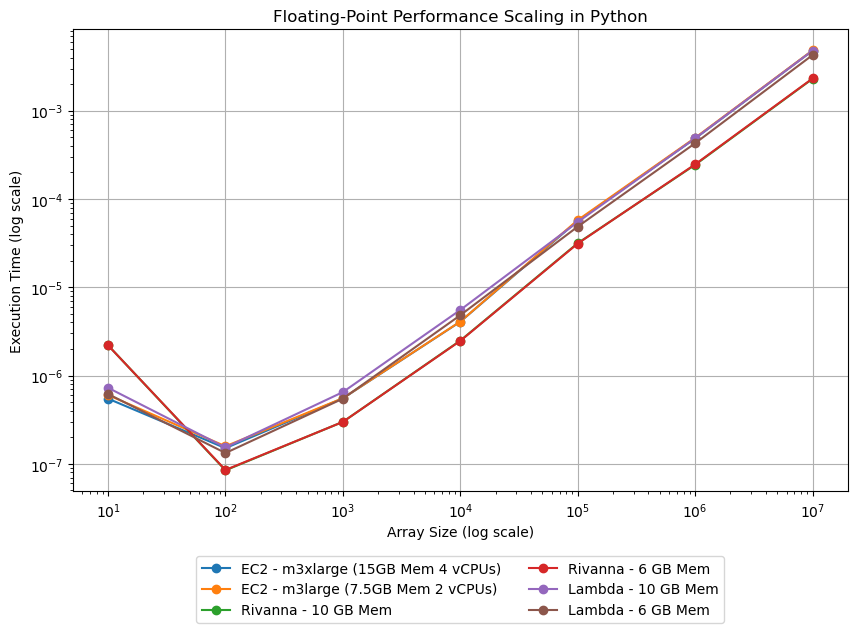

In [85]:
import numpy as np
import time
import matplotlib.pyplot as plt

world_size = [10**i for i in range(1, 8)] 


m3xlarge = [0.0000005481243134, 0.0000001507401466, 0.0000005530118942, 0.000004076659679, 0.00005660784245, 0.0004850190878, 0.0047980811]
m3large = [ 0.0000006029605865, 0.0000001583099365, 0.0000005548000336, 0.000004092693329, 0.00005765175819, 0.0004932017326, 0.004826764584]
rivanna_10GB = [0.000002207458019, 0.00000008451938629, 0.0000002992153168, 0.000002491474152, 0.00003159403801, 0.000244047761, 0.002300000966]
rivanna_6GB = [0.000002203345299, 0.00000008541345596, 0.0000002989768982, 0.000002471745014, 0.00003127920628, 0.0002469302416, 0.002318722904]
lambda_10GB = [0.0000007280707359, 0.0000001534819603, 0.0000006503462791, 0.000005539059639, 0.00005485147238, 0.0004876797199, 0.004792140365 ]
lambda_6GB = [0.0000006191134453, 0.0000001327395439, 0.0000005483627319, 0.000004828751087, 0.00004865157604, 0.0004282656908, 0.004271527648 ]

m3xlarge_err = [0.0000000219284616, 0.00000000371083794, 0.000000005466323309, 0.0000000392280684, 0.0000003688193629, 0.00001017303961, 0.00004288875286]
m3large_err = [0.0000242757024, 0.000007311186293, 0.0000150333643, 0.0001005758643, 0.00283274492, 0.0243740342, 0.2387482398]
rivanna_10GB_err = [0.00000002656584657, 0.000000001746595778, 0.000000003898222754, 0.00000001264742585, 0.0000002491704954, 0.000002875499357, 0.000004066278334]
rivanna_6GB_err = [0.00000001740346757, 0.000000002314625721, 0.0000002967715263, 0.000002467051148, 0.0000007504629548, 0.000005607525543, 0.00001910497274]
lambda_10GB_err = [0.0000001090301092, 0.000000008071974286, 0.000000006869807021, 0.00000005820620674, 0.0000004713064508, 0.000005178161853, 0.00003799048003 ]
lambda_6GB_err = [0.0000000279708622, 0.000000001190104416, 0.00000001374995313, 0.00000007419923653, 0.0000004070314913, 0.000005573296879, 0.00002161650892]





# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, m3xlarge, marker='o', label='EC2 - m3xlarge (15GB Mem 4 vCPUs)')
plt.plot(sizes, m3large, marker='o', label='EC2 - m3large (7.5GB Mem 2 vCPUs)')
plt.plot(sizes, rivanna_10GB, marker='o', label='Rivanna - 10 GB Mem')
plt.plot(sizes, rivanna_6GB, marker='o', label='Rivanna - 6 GB Mem')
plt.plot(sizes, lambda_10GB, marker='o', label='Lambda - 10 GB Mem')
plt.plot(sizes, lambda_6GB, marker='o', label='Lambda - 6 GB Mem')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Array Size (log scale)')
plt.ylabel('Execution Time (log scale)')
plt.title('Floating-Point Performance Scaling in Python')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 
plt.grid(True)

plt.show()
